# Web Scraping Job Vacancies

## Introduction

In this project, we'll build a web scraper to extract job listings from a popular job search platform. We'll extract job titles, companies, locations, job descriptions, and other relevant information.

Here are the main steps we'll follow in this project:

1. Setup our development environment
2. Understand the basics of web scraping
3. Analyze the website structure of our job search platform
4. Write the Python code to extract job data from our job search platform
5. Save the data to a CSV file
6. Test our web scraper and refine our code as needed

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and HTML structure. In addition, you may want to use the following packages in your Python environment:

- requests
- BeautifulSoup
- csv
- datetime

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install requests`
- `!pip install BeautifulSoup`

## Step 1: Importing Required Libraries

In [ ]:
# your code here

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [5]:
# job_sites = {
#     # "Indeed": "https://id.indeed.com/jobs?q={keyword}&l={location}"
#     # "JobStreet": "https://www.jobstreet.co.id/id/job-search/{keyword}-jobs/{location}",
#     # "Glassdoor": "https://www.glassdoor.com/Job/{location}-{keyword}-jobs-SRCH_IL.0,7_IC{location_code}.htm",
#     # "JobsDB": "https://id.jobsdb.com/id/search-jobs/{keyword}/{location}",
#     # "Karir": "https://www.karir.com/search?q={keyword}&l={location}",
#     # "Kalibrr": "https://www.kalibrr.id/job-board/te/{keyword}?location={location}"
# }

In [6]:
base_url = "https://id.jobstreet.com/id/{keyword}-jobs/in-{location}?page={page}"

keyword = "Any"
location = "Indonesia"
jobs = []

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/114.0.0.0 Safari/537.36"
}

In [7]:
max_pages = 80 #number of page to scan

job_data=[]

for page in range(1, max_pages + 1):
  url = base_url.format(keyword=keyword, location=location, page=page)
  print("Fetching:", url)

  response = requests.get(url, headers=headers)
  if response.status_code != 200:
      print("Error:", response.status_code)
      break

  soup = BeautifulSoup(response.text, "html.parser")
  jobs = soup.find_all("article")

  if not jobs:
      print("No more jobs found, stopping.")
      break

  print(f"Page {page}: {len(jobs)} jobs found")

  for job in jobs:
      title = job.find("a", {"data-automation": "jobTitle"})
      classification = job.find("span", {"data-automation": "jobClassification"})
      company = job.find("a", {"data-automation": "jobCompany"})
      job_location = job.find("a", {"data-automation": "jobLocation"})
      postings = job.find("span", {"data-automation": "jobListingDate"})
      salary = job.find("span", {"data-automation": "jobSalary"})
      job_description = job.find("span", {"data-automation": "jobShortDescription"})

      # print(f"Title: {title.get_text(strip=True) if title else None}")
      # print(f"Company: {company.get_text(strip=True) if company else None}")
      # print(f"Location: {job_location.get_text(strip=True) if job_location else None}")
      # print(f"Posting: {postings.get_text(strip=True) if postings else None}")
      # print(f"Salary: {salary.get_text(strip=True) if salary else None}")
      # print("-" * 40)

      job_data.append({
            "Title": title.get_text(strip=True) if title else None,
            "Classification": classification.get_text(strip=True) if classification else None,
            "Company": company.get_text(strip=True) if company else None,
            "Location": job_location.get_text(strip=True) if job_location else None,
            "Posting": postings.get_text(strip=True) if postings else None,
            "Salary": salary.get_text(strip=True) if salary else None,
            "Description": job_description.get_text(strip=True) if job_description else None
        })


      # print(job.prettify())

Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=1
Page 1: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=2
Page 2: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=3
Page 3: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=4
Page 4: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=5
Page 5: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=6
Page 6: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=7
Page 7: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=8
Page 8: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=9
Page 9: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=10
Page 10: 32 jobs found
Fetching: https://id.jobstreet.com/id/Any-jobs/in-Indonesia?page=11
Page 11: 32 jobs found
Fetching: https:/

In [8]:
df_job = pd.DataFrame(job_data)
df_job.head()

,Title,Classification,Company,Location,Posting,Salary,Description
0,Customer Service Agent (REMOTE),(Call Center & Layanan Konsumen),Deliveree (PT Angkut Teknologi Indonesia),Surakarta,1 hari yang lalu,Rp 4.000.000 per month,"If you just click apply, you will not receive ..."
1,Formalities Officer (Customer Service),(Administrasi & Dukungan Perkantoran),PT LPS Indonesia,Jakarta Raya,3 jam yang lalu,"Rp 6,500,000 – Rp 9,750,000 per month",Job Qualifications: Candidate must be holder o...
2,Export Import Staff,"(Manufaktur, Transportasi & Logistik)",PT Cakraindo Mitra Internasional,Medan,3 jam yang lalu,None,Responsible to handle related export import al...
3,Marketing Officer (Jambi),(Pemasaran & Komunikasi),PT Asuransi Raksa Pratikara,Jambi,22 menit yang lalu,"Rp 3,800,000 – Rp 5,550,000 per month","Conduct marketing activities, such as customer..."
4,Marketing Officer (Jabodetabek),(Perbankan & Layanan Finansial),PT Dipo Star Finance,Jakarta Raya,3 hari yang lalu,Rp 5.500.000 – Rp 7.000.000 per month,Acquire new customer and maintain good relatio...


In [9]:
df_job.shape

(2560, 7)

In [10]:
df_job.to_csv("jobstreet_jobs.csv", index=False, encoding="utf-8")

print("✅ Job data saved to jobstreet_jobs.csv")

✅ Job data saved to jobstreet_jobs.csv


In [11]:
df = pd.read_csv("jobstreet_jobs.csv")
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description
0,Customer Service Agent (REMOTE),(Call Center & Layanan Konsumen),Deliveree (PT Angkut Teknologi Indonesia),Surakarta,1 hari yang lalu,Rp 4.000.000 per month,"If you just click apply, you will not receive ..."
1,Formalities Officer (Customer Service),(Administrasi & Dukungan Perkantoran),PT LPS Indonesia,Jakarta Raya,3 jam yang lalu,"Rp 6,500,000 – Rp 9,750,000 per month",Job Qualifications: Candidate must be holder o...
2,Export Import Staff,"(Manufaktur, Transportasi & Logistik)",PT Cakraindo Mitra Internasional,Medan,3 jam yang lalu,NaN,Responsible to handle related export import al...
3,Marketing Officer (Jambi),(Pemasaran & Komunikasi),PT Asuransi Raksa Pratikara,Jambi,22 menit yang lalu,"Rp 3,800,000 – Rp 5,550,000 per month","Conduct marketing activities, such as customer..."
4,Marketing Officer (Jabodetabek),(Perbankan & Layanan Finansial),PT Dipo Star Finance,Jakarta Raya,3 hari yang lalu,Rp 5.500.000 – Rp 7.000.000 per month,Acquire new customer and maintain good relatio...


In [12]:
df.dtypes

,0
Title,object
Classification,object
Company,object
Location,object
Posting,object
Salary,object
Description,object


In [13]:
df.isnull().sum()

,0
Title,0
Classification,0
Company,86
Location,0
Posting,0
Salary,2095
Description,0


In [14]:
no_salary = float(df["Salary"].isnull().sum()) / len(df) * 100
print(f"Missing salary values: {no_salary:.2f}%")

Missing salary values: 81.84%


In [17]:
no_company = df["Company"].nunique()
print(f"numbers of company: {no_company}")

numbers of company: 1199


In [18]:
df["Company"].value_counts()

,count
Company,
"PT SMART,Tbk",76
Sheraton Bali Kuta Resort,42
Ruangguru.com,38
RGF HR Agent Indonesia,34
PT Mid Solusi Nusantara (MEKARI),29
...,...
PT Air Two Sea Logistics Indonesia,1
PT Dgl Expedisi Indonesia,1
Odoo,1


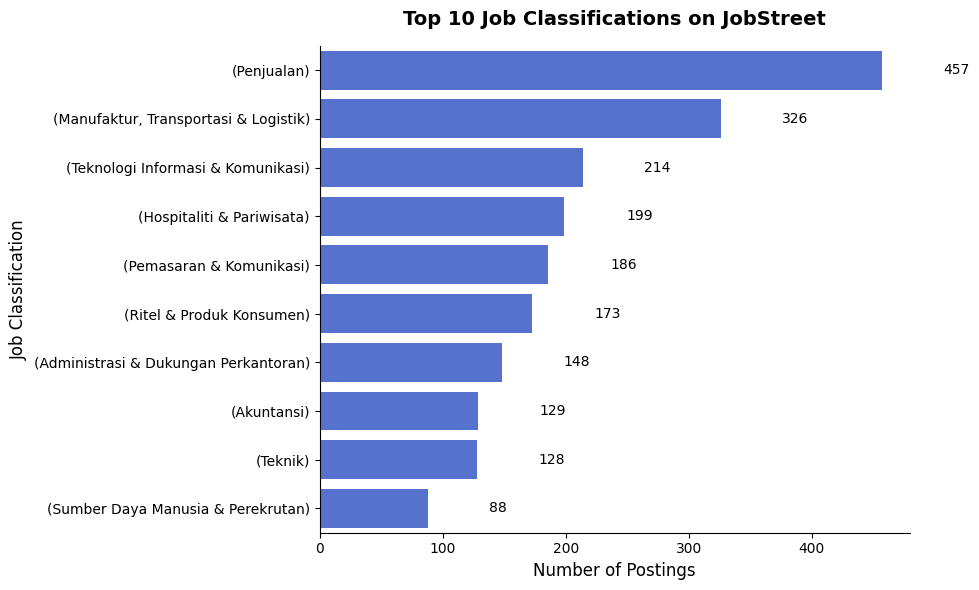

In [19]:
df_top10job = df["Classification"].value_counts().head(10)
plt.figure(figsize=(10,6))

sns.barplot(
    y=df_top10job.index,
    x=df_top10job.values,
    color="royalblue"
)

# Add value labels
for i, val in enumerate(df_top10job.values):
    plt.text(val + 50, i, str(val), va='center', fontsize=10)

plt.ylabel("Job Classification", fontsize=12)
plt.xlabel("Number of Postings", fontsize=12)
plt.title("Top 10 Job Classifications on JobStreet", fontsize=14, fontweight="bold", pad=15)
sns.despine()
plt.tight_layout()
plt.show()

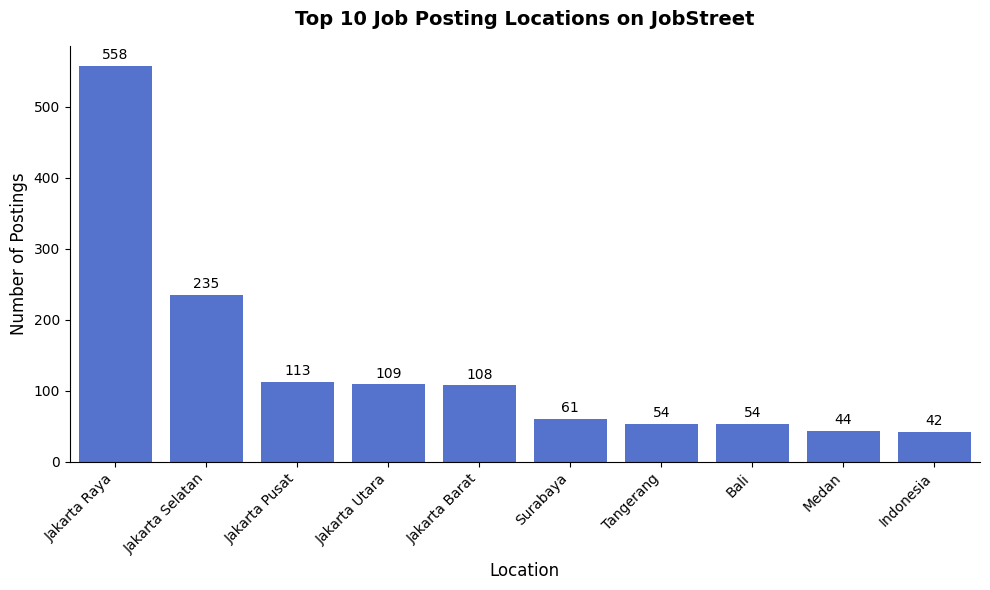

In [20]:
df_top10_location = df["Location"].value_counts().head(10)
# df_top10_location
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_top10_location.index,
    y=df_top10_location.values,
    color="royalblue"  # one consistent color
)

# Add labels on top of bars
for i, val in enumerate(df_top10_location.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=10)

plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Postings", fontsize=12)
plt.title("Top 10 Job Posting Locations on JobStreet", fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
sns.despine()
plt.tight_layout()
plt.show()

In [21]:
import folium
import pandas as pd
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

locations_coords = {
    "Jakarta Raya": {"lat": -6.2088, "lng": 106.8456},
    "Jakarta Selatan": {"lat": -6.2615, "lng": 106.8106},
    "Jakarta Utara": {"lat": -6.1380, "lng": 106.8823},
    "Jakarta Barat": {"lat": -6.1683, "lng": 106.7580},
    "Jakarta Pusat": {"lat": -6.1865, "lng": 106.8341},
    "Surabaya": {"lat": -7.2575, "lng": 112.7521},
    "Tangerang": {"lat": -6.1783, "lng": 106.6319},
    "Bali": {"lat": -8.4095, "lng": 115.1889},
    "Medan": {"lat": 3.5952, "lng": 98.6722},
    "Batam": {"lat": 1.0456, "lng": 104.0305}
}

df_locations = pd.DataFrame.from_dict(locations_coords, orient="index").reset_index()
df_locations.columns = ["Location", "Latitude", "Longitude"]
df_locations.head()

,Location,Latitude,Longitude
0,Jakarta Raya,-6.2088,106.8456
1,Jakarta Selatan,-6.2615,106.8106
2,Jakarta Utara,-6.1380,106.8823
3,Jakarta Barat,-6.1683,106.7580
4,Jakarta Pusat,-6.1865,106.8341


In [22]:
indonesia_coordinate = [-0.7893, 113.9213]
site_map = folium.Map(location=indonesia_coordinate, zoom_start=5)
site_map

In [23]:
# Initial the map
site_map = folium.Map(location=indonesia_coordinate, zoom_start=6)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label

for lat,lng,label in zip (df_locations['Latitude'], df_locations['Longitude'], df_locations['Location']):
  print([ lat,lng])
  circle = folium.Circle([ lat,lng], radius=1000, color='#d35400', fill=True,  popup=label)
  marker = folium.map.Marker(
    [lat,lng],
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % label,
        )
    )
  site_map.add_child(circle)
  site_map.add_child(marker)
site_map

[-6.2088, 106.8456]
[-6.2615, 106.8106]
[-6.138, 106.8823]
[-6.1683, 106.758]
[-6.1865, 106.8341]
[-7.2575, 112.7521]
[-6.1783, 106.6319]
[-8.4095, 115.1889]
[3.5952, 98.6722]
[1.0456, 104.0305]


In [24]:
df.isnull().sum()

,0
Title,0
Classification,0
Company,86
Location,0
Posting,0
Salary,2095
Description,0


In [25]:
import re

def normalize_number(s: str) -> float:
    """
    Convert salary string with commas/dots to float safely.
    Handles '1.000.000,10' and '1,000,000.10'.
    """
    if s is None:
      return None
    if not re.search(r"\d", s):
      return None

    s = s.strip()

    # Case 1: European/Indonesian format → decimals with comma
    if re.search(r",\d{1,2}$", s):
        s = s.replace(".", "")       # remove thousands separator
        s = s.replace(",", ".")      # convert decimal comma to dot

    # Case 2: US format → decimals with dot
    elif re.search(r"\.\d{1,2}$", s):
        s = s.replace(",", "")       # remove thousands separator

    # Case 3: No decimals → just strip separators
    else:
        s = s.replace(".", "").replace(",", "")

    return float(s)


In [26]:

def parse_salary(s):


    if pd.isna(s):
        return None, None, None,None


    if "per month" in s:
        unit = "month"
    elif "per year" in s:
        unit = "year"
    elif "per hour" in s:
        unit = "hour"
    else:
        unit = None

    if "Rp" in s:
       currency = "IDR"
    elif "$" in s:
        currency = "USD"
        convert = True
    elif "SGD" in s:
        currency = "SGD"
        convert = True
    else:
        currency = None


    s_clean = s.replace("Rp", "").replace("per month", "").replace("per year", "").replace("per hour", "").replace("$", "").replace("(SGD)", "").replace("(USD)", "").strip()
    low = None
    high = None
    if " – " in s_clean:
      s_clean = s_clean.split(" – ")
      low = normalize_number(s_clean[0])
      high =normalize_number(s_clean[1])
    else:
      low =normalize_number(s_clean)
      high = normalize_number(s_clean)


    return low,high, unit, currency





In [27]:
df[["Salary_Low","Salary_High", "Unit", "Currency"]] = df["Salary"].apply(lambda x: pd.Series(parse_salary(x)))
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
0,Customer Service Agent (REMOTE),(Call Center & Layanan Konsumen),Deliveree (PT Angkut Teknologi Indonesia),Surakarta,1 hari yang lalu,Rp 4.000.000 per month,"If you just click apply, you will not receive ...",4000000.0,4000000.0,month,IDR
1,Formalities Officer (Customer Service),(Administrasi & Dukungan Perkantoran),PT LPS Indonesia,Jakarta Raya,3 jam yang lalu,"Rp 6,500,000 – Rp 9,750,000 per month",Job Qualifications: Candidate must be holder o...,6500000.0,9750000.0,month,IDR
2,Export Import Staff,"(Manufaktur, Transportasi & Logistik)",PT Cakraindo Mitra Internasional,Medan,3 jam yang lalu,NaN,Responsible to handle related export import al...,NaN,NaN,None,None
3,Marketing Officer (Jambi),(Pemasaran & Komunikasi),PT Asuransi Raksa Pratikara,Jambi,22 menit yang lalu,"Rp 3,800,000 – Rp 5,550,000 per month","Conduct marketing activities, such as customer...",3800000.0,5550000.0,month,IDR
4,Marketing Officer (Jabodetabek),(Perbankan & Layanan Finansial),PT Dipo Star Finance,Jakarta Raya,3 hari yang lalu,Rp 5.500.000 – Rp 7.000.000 per month,Acquire new customer and maintain good relatio...,5500000.0,7000000.0,month,IDR


In [28]:
df['Unit'].value_counts()

,count
Unit,
month,458
hour,3
year,3


In [29]:
df = df[df['Unit']=='month']

In [30]:
max_salary = df['Salary_High'].max()
min_salary = df['Salary_Low'].min()

print(f"Maximum Salary: {max_salary}")
print(f"Minimum Salary: {min_salary}")

Maximum Salary: 65000000.0
Minimum Salary: 666.0


In [31]:
df_max = df[df['Salary_High'] == max_salary]
df_max

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
1720,Senior Sales Manager,(Perbankan & Layanan Finansial),Tdecision Malaysia Sdn Bhd,Jakarta Raya,24 hari yang lalu,"Rp 45,000,000 – Rp 65,000,000 per month",Lead a dynamic sales team at a leading financi...,45000000.0,65000000.0,month,IDR


In [32]:
df_min = df[df['Salary_Low'] == min_salary]
df_min

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
1110,Internal Audit – Operations,(Akuntansi),PT Amman Mineral Nusa Tenggara,Sumbawa Barat,10 hari yang lalu,Rp 666 – Rp 999 per month,"Responsible for providing an independent, obje...",666.0,999.0,month,IDR


In [33]:
df['Average_salary'] = (df['Salary_Low'] + df['Salary_High']) / 2


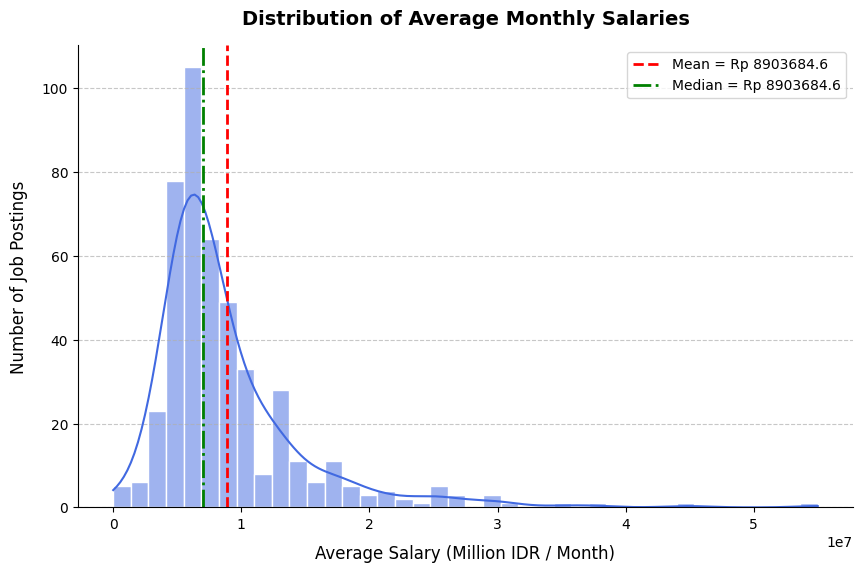

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df['Average_salary'], bins=40, kde=True, color="royalblue", edgecolor="white")
plt.xlabel("Average Salary (Million IDR / Month)", fontsize=12, labelpad=10)
plt.ylabel("Number of Job Postings", fontsize=12, labelpad=10)
plt.title("Distribution of Average Monthly Salaries", fontsize=14, fontweight="bold", pad=15)
plt.axvline(df['Average_salary'].mean(), color="red", linestyle="--", linewidth=2, label=f"Mean = Rp {df['Average_salary'].mean():.1f}")
plt.axvline(df['Average_salary'].median(), color="green", linestyle="-.", linewidth=2, label=f"Median = Rp {df['Average_salary'].mean():.1f}")

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
sns.despine()
plt.show()

In [35]:
df.describe()

,Salary_Low,Salary_High,Average_salary
count,4.580000e+02,4.580000e+02,4.580000e+02
mean,7.673458e+06,1.013391e+07,8.903685e+06
std,5.076429e+06,6.986829e+06,6.008432e+06
min,6.660000e+02,9.990000e+02,8.325000e+02
25%,5.000000e+06,6.000000e+06,5.606250e+06
50%,6.000000e+06,8.000000e+06,7.000000e+06
75%,9.000000e+06,1.200000e+07,1.042500e+07
max,4.500000e+07,6.500000e+07,5.500000e+07
